In [236]:
import numpy as np
import pandas as pd
from pandas import DataFrame as df
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as seabornInstance 
import scipy.stats as stats
import sklearn.linear_model as lm
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline



# Data Set Description




# Description

In [237]:
#Inputs the data set
tips = sns.load_dataset("tips")


In [238]:
#Print first five lines
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [239]:
#Prints last five lines
tips.tail()


,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [240]:
#The shape property attributes a tuple of array dimensions to an array and can be used to reshape it.
tips.shape

(244, 7)

In [241]:
#Utilise descriptive statistics
tips.describe()


,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


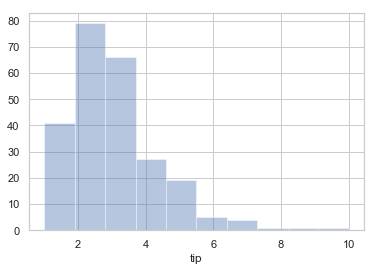

In [242]:
#Looking at a univariate distribution seaborn using the distplot() function. A histogram devised, a kernel density estimate (KDE) is produced which offers a probability density function that can inform us of how a continuos random variable is distributed.  
#Adapted https://towardsdatascience.com/analyze-the-data-through-data-visualization-using-seaborn-255e1cd3948e
sns.distplot(tips['tip'], kde=False, bins=10)

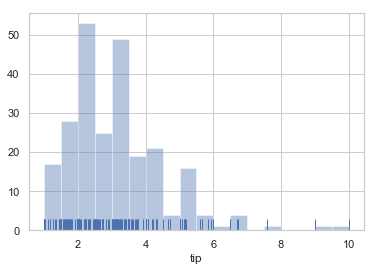

In [243]:
#A histogram will show the distribution of data by utilising bins and rugs which draw bars at points along to highlight the individual number of conclusions.
#Adapted from https://seaborn.pydata.org/tutorial/distributions.html
sns.distplot(tips['tip'], kde=False, rug=True)

In [244]:
#Obtains more information of the data type for each variable in our dataset
#Adapted from https://towardsdatascience.com/a-quick-guide-on-descriptive-statistics-using-pandas-and-seaborn-2aadc7395f32
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
dtypes: category(4), float64(2), int64(1)
memory usage: 7.2 KB


In [245]:
#Obtains the mean and median of the total_bill
#Adapted from https://towardsdatascience.com/a-quick-guide-on-descriptive-statistics-using-pandas-and-seaborn-2aadc7395f32
av= tips['tip'].mean()
print(av)

2.9982786885245902


In [246]:
medium = tips['tip'].median()
print(medium)

2.9


In [247]:
#Obtains and prints the standard deviation of the total_bill, which shows how the values deviate out form their mean.
#Adapted from https://towardsdatascience.com/a-quick-guide-on-descriptive-statistics-using-pandas-and-seaborn-2aadc7395f32
stand_dev = tips['tip'].std()
print(stand_dev)

1.3836381890011826


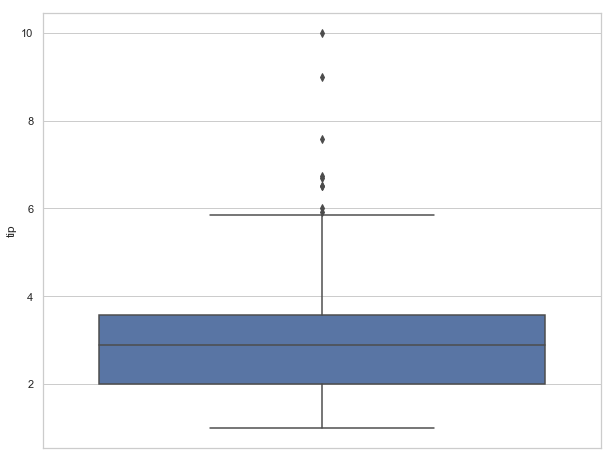

In [248]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,8))
ax = sns.boxplot(x='tip', data=tips, orient="v")

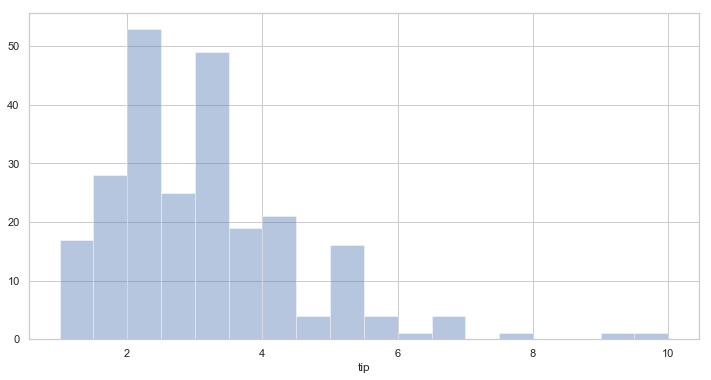

In [249]:
show_data = tips.dropna(subset=['tip'])
plt.figure(figsize=(12, 6))
sns.distplot(show_data['tip'], kde=False)

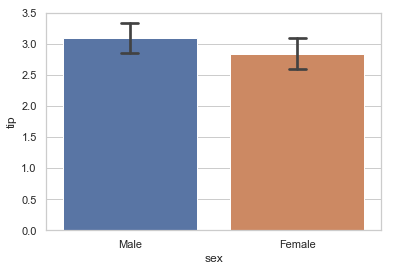

In [250]:
#A bar plot shows an assessment of central tendency in a numeric variable with the height of each rectangle and shows some of the uncertainty regarding estimates utilising error bars.
#Adapted from https://seaborn.pydata.org/generated/seaborn.barplot.html
sns.barplot(x= 'sex', y= 'tip', data = tips, capsize=.1)

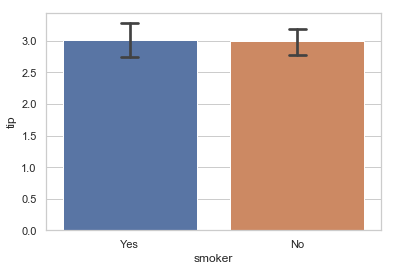

In [251]:
sns.barplot(x= 'smoker', y= 'tip', data = tips, capsize=.1)

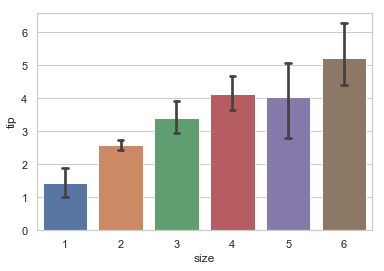

In [252]:
sns.barplot(x= 'size', y= 'tip', data = tips, capsize=.1)

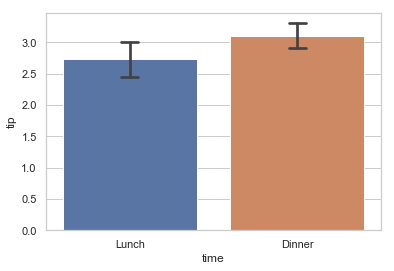

In [253]:
sns.barplot(x= 'time', y= 'tip', data = tips, capsize=.1)

# Regression

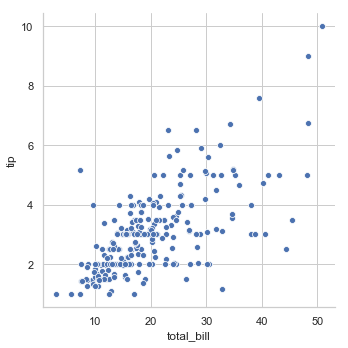

In [254]:
#Relplot allows us to draw a scatterplot comparing the variables of tips according to total_bill and informs if there is a relationship of these variables
#Adapted from https://towardsdatascience.com/analyze-the-data-through-data-visualization-using-seaborn-255e1cd3948e
sns.relplot(x="total_bill", y="tip", data=tips)

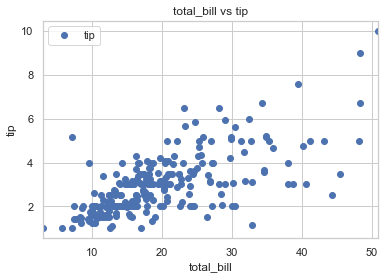

In [255]:
#plotting the data on a 2Dgraph to display the relationship between the variables
#Adapted from https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f
tips.plot(x='total_bill', y='tip', style='o')  
plt.title('total_bill vs tip')  
plt.xlabel('total_bill')  
plt.ylabel('tip')  
plt.show()

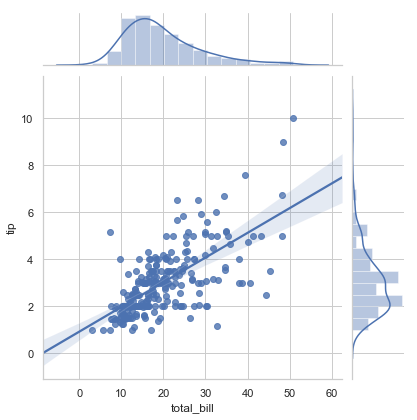

In [256]:
# The jointplot function allows us to visualise both the joint and individual distribution. In utilising the ‘reg’ to the kind parameter, a regression line can be added. We can visualise a linear relationship between the tips and total bill particularly at the lower end.
#https://towardsdatascience.com/visualizing-statistical-plots-with-seaborn-6b6e60ce5e71
sns.jointplot(x = 'total_bill', y = 'tip', data = tips, kind = 'reg')

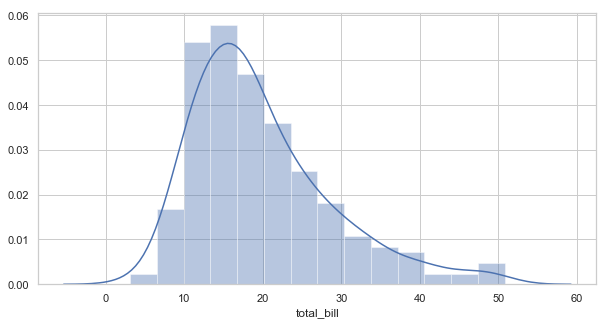

In [257]:
#plotting the average max total_bill
#Adapted from https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f
plt.figure(figsize=(10,5))
plt.tight_layout()
sns.distplot(tips['total_bill'])

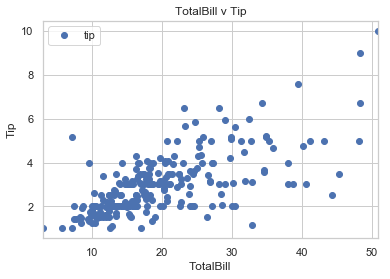

In [258]:
#Plots the variables total_bill and tips to discern the relationship
#https://www.kdnuggets.com/2019/03/beginners-guide-linear-regression-python-scikit-learn.html
tips.plot(x='total_bill', y='tip', style='o')  
plt.title('TotalBill v Tip')  
plt.xlabel('TotalBill')  
plt.ylabel('Tip')  
plt.show()

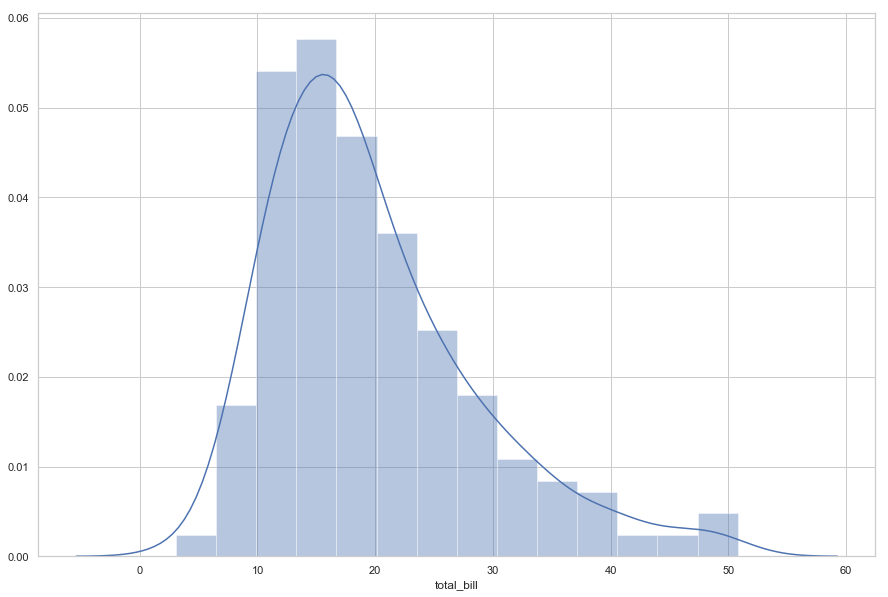

In [259]:
#plt.figure() devises a figure object. It is useful in adjusting the size of the figure and if we add objects in a single figure.
#https://www.kdnuggets.com/2019/03/beginners-guide-linear-regression-python-scikit-learn.html
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(tips['total_bill'])

In [260]:
#If one aims to predict the tips based on the highest total bill, the attribute of total_bill is stored in the x variable and the label of tips stored in the y.
#https://www.kdnuggets.com/2019/03/beginners-guide-linear-regression-python-scikit-learn.html
X = tips['total_bill'].values.reshape(-1,1)
y = tips['tip'].values.reshape(-1,1)



In [261]:
#80% of the data is attributed to the training set and 20% to the test set. The test_size variable stores the test set.
#https://www.kdnuggets.com/2019/03/beginners-guide-linear-regression-python-scikit-learn.html
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [262]:
#One can train the algorithm by importing Linear Regression 
#https://www.kdnuggets.com/2019/03/beginners-guide-linear-regression-python-scikit-learn.html
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [263]:
#To see the values of the intercept and slope, the below code is acivated. A line that best fits the data will be produced in Linear Regression
#https://www.kdnuggets.com/2019/03/beginners-guide-linear-regression-python-scikit-learn.html
#To retrieve the intercept:
print(regressor.intercept_)

#For retrieving the slope:
print(regressor.coef_)


[1.02854395]
[[0.0968534]]


In [264]:
#The following code will use the tested data to predict how well our algorithm produces as a score.
#https://www.kdnuggets.com/2019/03/beginners-guide-linear-regression-python-scikit-learn.html
y_pred = regressor.predict(X_test)

In [265]:
#The results are compared with the predicted when the following code is ran.
#https://www.kdnuggets.com/2019/03/beginners-guide-linear-regression-python-scikit-learn.html
tips = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
tips


,Actual,Predicted
0,2.64,2.732195
1,3.76,2.799993
2,3.51,2.916217
3,1.00,1.730731
4,2.50,2.604349
5,1.00,1.585451
6,3.08,2.764157
7,5.65,3.288134
8,3.50,2.786433
9,3.68,4.384514


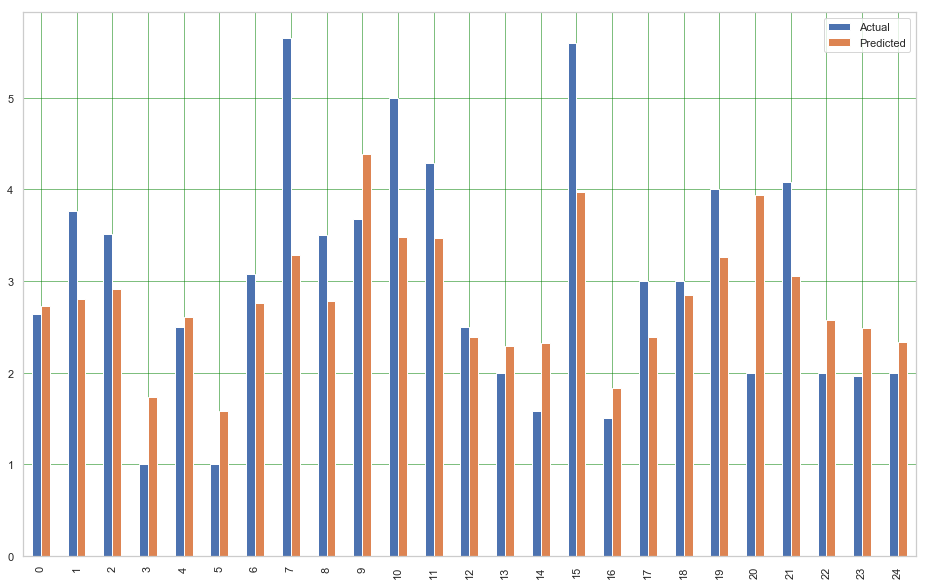

In [266]:
#A bar graph is produced displaying both the real and estimated values
#https://www.kdnuggets.com/2019/03/beginners-guide-linear-regression-python-scikit-learn.html
tips2= tips.head(25)
tips2.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

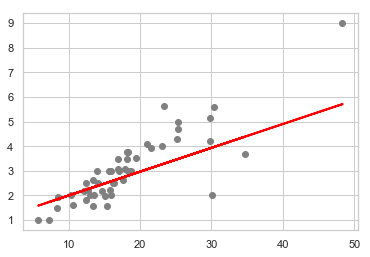

In [267]:
#A straight line is plotted using the test data
#https://www.kdnuggets.com/2019/03/beginners-guide-linear-regression-python-scikit-learn.html
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [268]:
#One can establish how well the algorithm works by using the following metrics to understand how different algorithms work with certain datasets.
#https://www.kdnuggets.com/2019/03/beginners-guide-linear-regression-python-scikit-learn.html
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.6564074900962108
Mean Squared Error: 0.821309064276629
Root Mean Squared Error: 0.9062610353957787


# Analyse

ValueError: Could not interpret input 'total_bill'

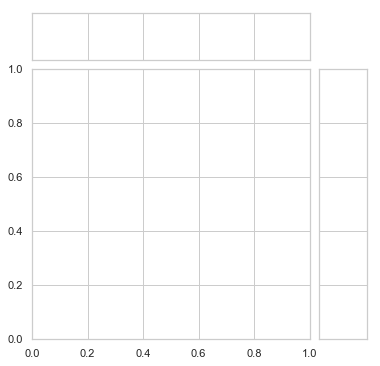

In [269]:
#https://towardsdatascience.com/visualizing-statistical-plots-with-seaborn-6b6e60ce5e71
sns.jointplot(x = 'total_bill', y = 'tip', data = tips)

In [ ]:
#The pairplot function permits visualising the data through a general overview of all numerical data by plotting each against each other.
tips = sns.load_dataset("tips")
sns.pairplot(tips);

In [ ]:
#In the following pairplot, the numerical variables tips and total_bill are plotted against one another and the categorical variable of smoker can be included as hue and is noted by colour on the graph.
sns.pairplot(tips, vars=["tip", "total_bill"], hue='smoker' )

In [ ]:
#In the following pairplot, the numerical variables tips and total_bill are plotted against one another and the categorical variable of sex can be included as hue and is noted by colour on the graph.

sns.pairplot(tips, vars=["tip", "total_bill"], hue='sex' )

In [ ]:
#In the following pairplot, the numerical variables tips and total_bill are plotted against one another and the categorical variable of day can be included as hue and is noted by colour on the graph.
sns.pairplot(tips, vars=["tip", "total_bill"], hue='day' )

In [ ]:
#Adapted from https://medium.com/@neuralnets/data-visualization-with-python-and-seaborn-part-6-additional-linear-data-regression-plots-7a6fd469cea6
#In the following pairplot, the numerical variables tips and total_bill are plotted against one another and the categorical variable of time can be included as hue and is noted by colour on the graph.
sns.pairplot(tips, vars=["tip", "total_bill"], hue='time' )

In [ ]:
##Adapted from https://medium.com/@neuralnets/data-visualization-with-python-and-seaborn-part-6-additional-linear-data-regression-plots-7a6fd469cea6
#In the following pairplot, the numerical variables tips and total_bill are plotted against one another and the numerical variable of size can be included as hue and is noted by colour on the graph.
sns.pairplot(tips, vars=["tip", "total_bill"], hue='size' )

In [ ]:
#Adapted from https://medium.com/@1522933668924/using-matplotlib-in-jupyter-notebooks-comparing-methods-and-some-tips-python-c38e85b40ba1
%matplotlib inline
import matplotlib.pyplot as plt
tips.plot()
plt.show()

In [ ]:
#Adapted from https://towardsdatascience.com/analyze-the-data-through-data-visualization-using-seaborn-255e1cd3948e
sns.catplot(x="time", y="total_bill", kind="boxen", data=tips);


In [ ]:
#Adapted from https://towardsdatascience.com/analyze-the-data-through-data-visualization-using-seaborn-255e1cd3948e
sns.catplot(x="day", y="total_bill", kind="boxen", data=tips);

In [ ]:
#Adapted from https://towardsdatascience.com/analyze-the-data-through-data-visualization-using-seaborn-255e1cd3948e
import seaborn as sns
sns.catplot(x="time", y="total_bill", hue="smoker", kind="strip", data=tips);


In [ ]:
#Adapted from https://towardsdatascience.com/analyze-the-data-through-data-visualization-using-seaborn-255e1cd3948e
import seaborn as sns
sns.catplot(x="day", y="total_bill", hue="smoker", kind="strip", data=tips);

In [ ]:
#Adapted from https://towardsdatascience.com/analyze-the-data-through-data-visualization-using-seaborn-255e1cd3948e
import seaborn as sns
sns.catplot(x="time", y="total_bill", hue="sex", kind="strip", data=tips);

In [ ]:
#Adapted from https://towardsdatascience.com/analyze-the-data-through-data-visualization-using-seaborn-255e1cd3948e
import seaborn as sns
sns.catplot(x="day", y="total_bill", hue="sex", kind="strip", data=tips);

In [ ]:
#Adapted from https://towardsdatascience.com/analyze-the-data-through-data-visualization-using-seaborn-255e1cd3948e
import seaborn as sns
sns.catplot(x="time", y="total_bill", hue="smoker", kind="strip", data=tips);

In [ ]:
#Adapted from https://towardsdatascience.com/analyze-the-data-through-data-visualization-using-seaborn-255e1cd3948e
import seaborn as sns
sns.catplot(x="time", y="total_bill", hue="smoker", kind="strip", data=tips);

In [ ]:
#Adapted from https://towardsdatascience.com/analyze-the-data-through-data-visualization-using-seaborn-255e1cd3948e
sns.catplot(x="time", y="total_bill", hue="smoker", kind="point", data=tips);


In [ ]:
#Adapted from https://towardsdatascience.com/analyze-the-data-through-data-visualization-using-seaborn-255e1cd3948e
sns.catplot(x="time", y="total_bill", hue="smoker",
            kind="swarm", data=tips);

In [ ]:
#Adapted from https://towardsdatascience.com/analyze-the-data-through-data-visualization-using-seaborn-255e1cd3948e

sns.catplot(x="time", y="total_bill", hue="smoker", kind="boxen", data=tips);


In [ ]:
df = sns.load_dataset('tips')

sns.lmplot(x='x', y='y', col='dataset', hue='dataset', tips=df, col_wrap=2, ci=None, palette='spring', size=3.5, scatter_kws={'s': 60, 'alpha': 1})